TASK (1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
import kagglehub

In [ ]:
path = kagglehub.dataset_download("apollo2506/facial-recognition-dataset")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/facial-recognition-dataset


In [ ]:
image_size = (64, 64)

train_dataset = keras.utils.image_dataset_from_directory(
    "/kaggle/input/facial-recognition-dataset/Training/Training",
    labels='inferred',
    shuffle=True,
    validation_split=0.2,
    subset="training",
    image_size=image_size,
    seed=11
)

val_dataset = keras.utils.image_dataset_from_directory(
    "/kaggle/input/facial-recognition-dataset/Training/Training",
    labels='inferred',
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    image_size=image_size,
    seed=11
)


Found 28273 files belonging to 6 classes.
Using 22619 files for training.
Found 28273 files belonging to 6 classes.
Using 5654 files for validation.


In [ ]:
rescale_layer = keras.layers.Rescaling(1.0 / 255)

def apply_rescaling(dataset):
    def rescale_images(images, labels):
        return rescale_layer(images), labels
    return dataset.map(rescale_images)

train_dataset = apply_rescaling(train_dataset)
val_dataset = apply_rescaling(val_dataset)


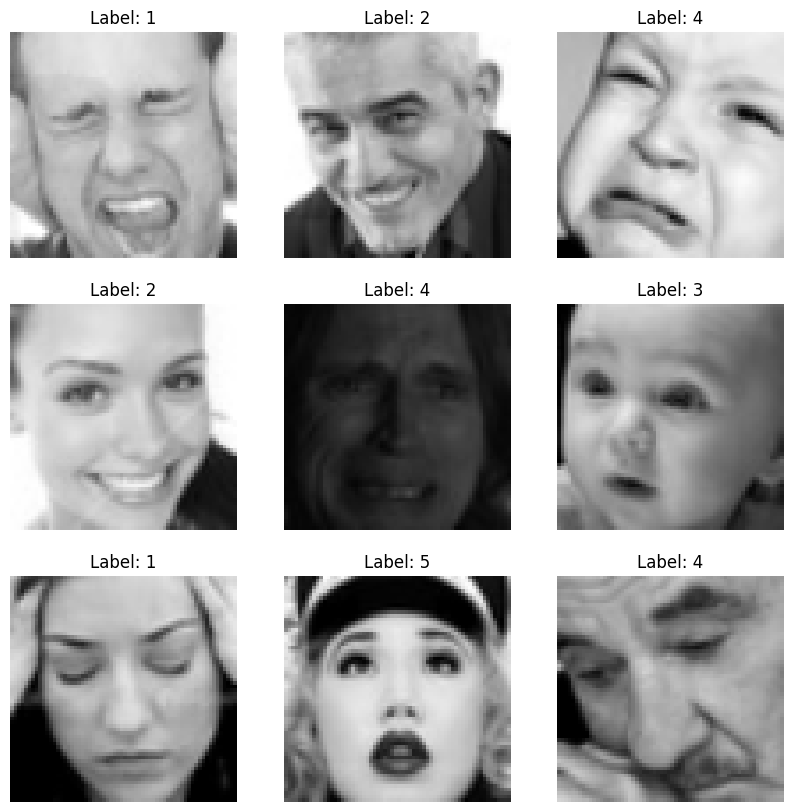

In [ ]:
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess

def apply_preprocessing(dataset, preprocessing_function):
    def preprocess(images, labels):
        return preprocessing_function(images), labels
    return dataset.map(preprocess)

train_dataset_resnet = apply_preprocessing(train_dataset, resnet_preprocess)
val_dataset_resnet = apply_preprocessing(val_dataset, resnet_preprocess)

train_dataset_vgg = apply_preprocessing(train_dataset, vgg_preprocess)
val_dataset_vgg = apply_preprocessing(val_dataset, vgg_preprocess)


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, VGG16

def build_model(base_model):
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(6, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_resnet.trainable = False
resnet_model = build_model(base_resnet)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history_resnet = resnet_model.fit(
    train_dataset_resnet,
    validation_data=val_dataset_resnet,
    epochs=30,
    callbacks=[early_stopping]
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 89s 108ms/step - accuracy: 0.2231 - loss: 1.8104 - val_accuracy: 0.2527 - val_loss: 1.7540
Epoch 2/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.2478 - loss: 1.7580 - val_accuracy: 0.2527 - val_loss: 1.7456
Epoch 3/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.2480 - loss: 1.7469 - val_accuracy: 0.2527 - val_loss: 1.7415
Epoch 4/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.2492 - loss: 1.7413 - val_accuracy: 0.2527 - val_loss: 1.7256
Epoch 5/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.2518 - loss: 1.7344 - val_accuracy: 0.2529 - val_loss: 1.7258
Epoch 6/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.2556 - loss: 1.7298 - val_accuracy: 0.2538 - val_loss: 1.7227
Epoch 7/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.2588 - loss: 1.7232 - val_accuracy: 0.2621 - val_loss: 1.7094
Epoch 8/30
707/707 ━━━━━━━━━━━━━━━━━━━

In [ ]:
base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_vgg.trainable = False
vgg_model = build_model(base_vgg)

history_vgg = vgg_model.fit(
    train_dataset_vgg,
    validation_data=val_dataset_vgg,
    epochs=30,
    callbacks=[early_stopping]
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.2021 - loss: 3.3184 - val_accuracy: 0.2533 - val_loss: 1.7653
Epoch 2/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.2446 - loss: 1.7680 - val_accuracy: 0.2527 - val_loss: 1.7597
Epoch 3/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.2468 - loss: 1.7639 - val_accuracy: 0.2527 - val_loss: 1.7579
Epoch 4/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.2480 - loss: 1.7631 - val_accuracy: 0.2527 - val_loss: 1.7578
Epoch 5/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.2482 - loss: 1.7619 - val_accuracy: 0.2527 - val_loss: 1.7587
Epoch 6/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.2488 - loss: 1.7607 - val_accuracy: 0.2527 - val_loss: 1.7580
Epoch 7/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.2482 - loss: 1.7605 - val_accuracy: 0.2527 - val_loss: 1.7580
Epoch 8/30
707/707 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
test_dataset = keras.utils.image_dataset_from_directory(
    "/kaggle/input/facial-recognition-dataset/Testing/Testing",
    labels='inferred',
    shuffle=False,
    image_size=image_size,
    seed=11
)

test_dataset = apply_rescaling(test_dataset)
test_dataset_resnet = apply_preprocessing(test_dataset, resnet_preprocess)
test_dataset_vgg = apply_preprocessing(test_dataset, vgg_preprocess)


Found 7067 files belonging to 6 classes.


In [ ]:
resnet_test_loss, resnet_test_accuracy = resnet_model.evaluate(test_dataset_resnet)
print(f"ResNet Test Loss: {resnet_test_loss:.4f}")
print(f"ResNet Test Accuracy: {resnet_test_accuracy:.4f}")

vgg_test_loss, vgg_test_accuracy = vgg_model.evaluate(test_dataset_vgg)
print(f"VGG Test Loss: {vgg_test_loss:.4f}")
print(f"VGG Test Accuracy: {vgg_test_accuracy:.4f}")


221/221 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.2243 - loss: 1.7173
ResNet Test Loss: 1.6437
ResNet Test Accuracy: 0.3075
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.2311 - loss: 1.7827
VGG Test Loss: 1.7592
VGG Test Accuracy: 0.2510


In [ ]:
print("\nModel Comparison:")
if resnet_test_accuracy > vgg_test_accuracy:
    print(f"ResNet performs better with a test accuracy of {resnet_test_accuracy:.4f}")
elif resnet_test_accuracy < vgg_test_accuracy:
    print(f"VGG performs better with a test accuracy of {vgg_test_accuracy:.4f}")
else:
    print("Both models perform equally well.")



Model Comparison:
ResNet performs better with a test accuracy of 0.3075


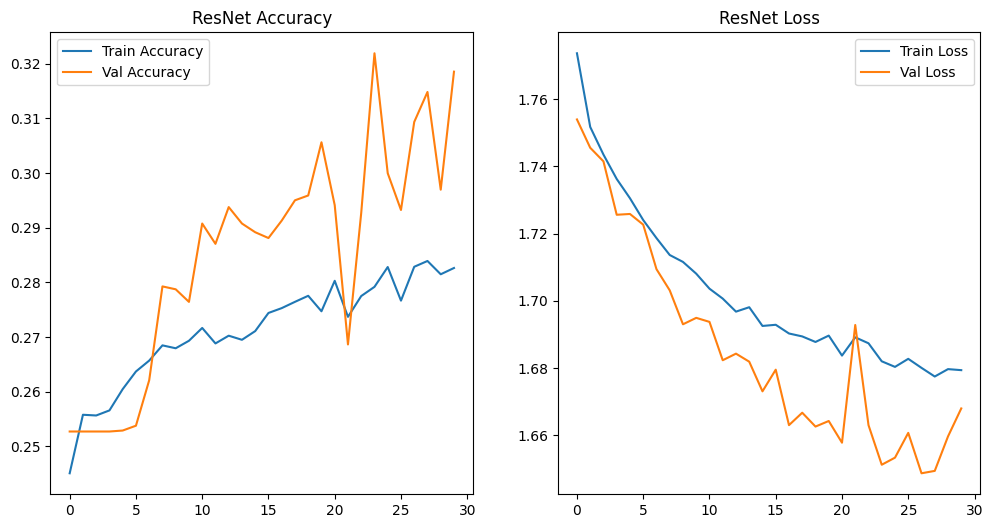

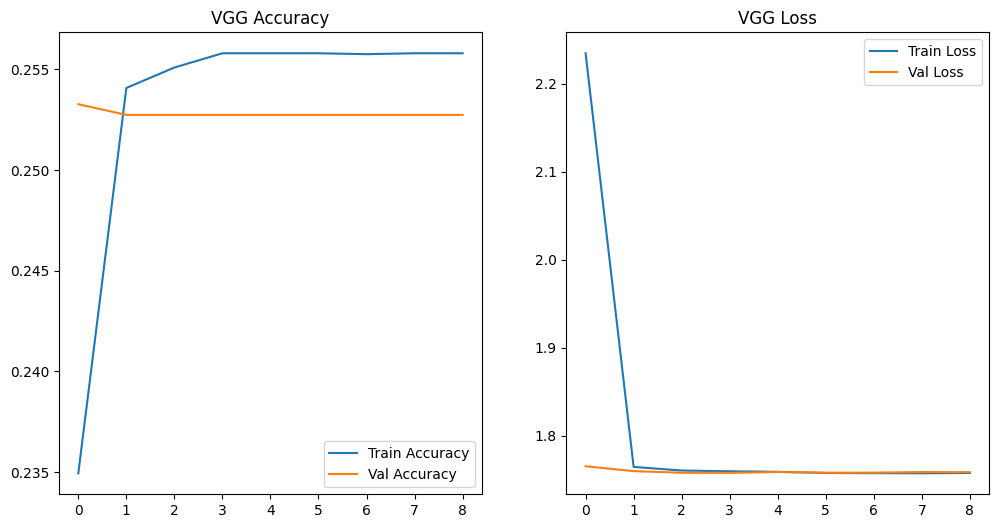

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f"{title} Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"{title} Loss")
    plt.legend()

    plt.show()

plot_history(history_resnet, "ResNet")
plot_history(history_vgg, "VGG")


TASK (2)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K
from sklearn.datasets import fetch_lfw_pairs


In [ ]:
lfw_train = fetch_lfw_pairs(subset='train', color=True, resize=1.0)
lfw_test = fetch_lfw_pairs(subset='test', color=True, resize=1.0)

X_train_pairs = lfw_train.pairs
y_train = lfw_train.target
X_test_pairs = lfw_test.pairs
y_test = lfw_test.target

def preprocess_pairs(pairs, target_size=(105, 105)):
    X1, X2 = [], []
    for img1, img2 in pairs:
        img1 = cv2.resize(img1, target_size)
        img2 = cv2.resize(img2, target_size)
        X1.append(img1 / 255.0)
        X2.append(img2 / 255.0)
    return np.array(X1), np.array(X2)

X1_train, X2_train = preprocess_pairs(X_train_pairs)
X1_test, X2_test = preprocess_pairs(X_test_pairs)


In [ ]:
class L1DistanceLayer(Layer):
    def call(self, inputs):
        feat_a, feat_b = inputs
        return K.abs(feat_a - feat_b)


In [ ]:
def create_simple_network(input_shape=(105, 105, 3)):
    input_layer = Input(shape=input_shape)
    x = Flatten()(input_layer)
    x = Dense(128, activation='relu')(x)
    return Model(inputs=input_layer, outputs=x)

base_network = create_simple_network()

input_a = Input(shape=(105, 105, 3))
input_b = Input(shape=(105, 105, 3))

feat_a = base_network(input_a)
feat_b = base_network(input_b)

distance = L1DistanceLayer()([feat_a, feat_b])
output = Dense(1, activation='sigmoid')(distance)

siamese_model = Model(inputs=[input_a, input_b], outputs=output)
siamese_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = siamese_model.fit(
    [X1_train, X2_train], y_train,
    validation_data=([X1_test, X2_test], y_test),
    batch_size=32,
    epochs=10,
    callbacks=[early_stop]
)


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5068 - loss: 0.6870 - val_accuracy: 0.5460 - val_loss: 0.6754
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5664 - loss: 0.6730 - val_accuracy: 0.5840 - val_loss: 0.6630
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6166 - loss: 0.6524 - val_accuracy: 0.5870 - val_loss: 0.6526
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6603 - loss: 0.6342 - val_accuracy: 0.6170 - val_loss: 0.6446
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6724 - loss: 0.6176 - val_accuracy: 0.6320 - val_loss: 0.6382
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7044 - loss: 0.6017 - val_accuracy: 0.6450 - val_loss: 0.6347
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7462 - loss: 0.5725 - val_accuracy: 0.6480 - val_loss: 0.6331
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7335 - loss: 0.5647 - val_accuracy: 0.6460 - val_

In [ ]:
test_loss, test_acc = siamese_model.evaluate([X1_test, X2_test], y_test)
print(f"Final Test Accuracy: {test_acc:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5894 - loss: 0.6884
Final Test Accuracy: 0.6480


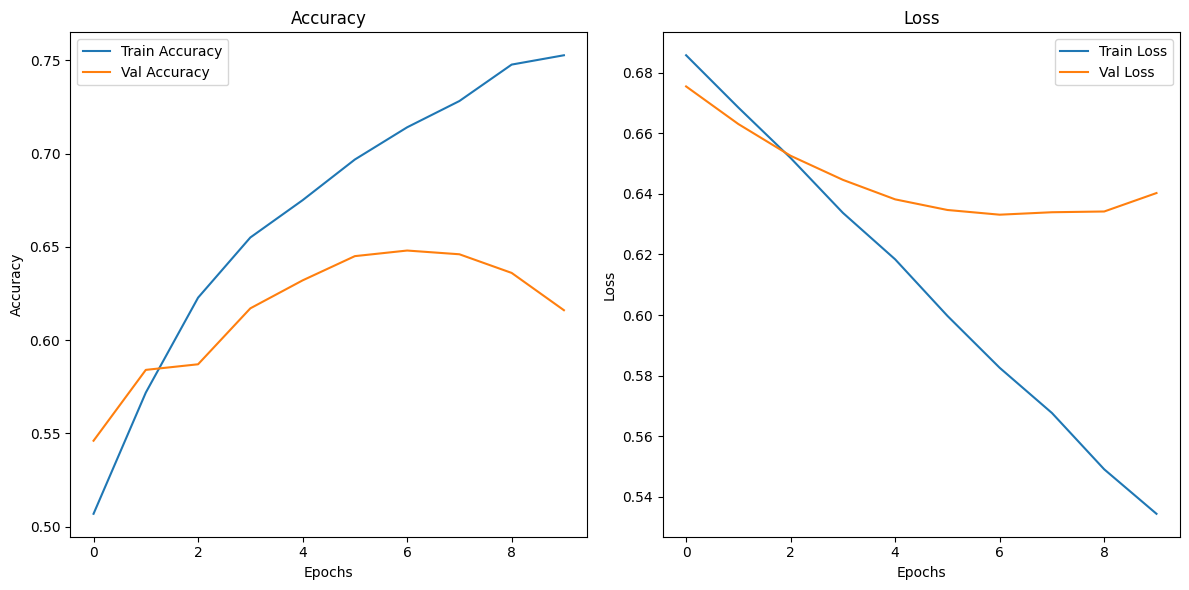

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
